# 1. Fitting a logistic regression model to the iris data set

### We will work with the iris data set. Specifically, with a subset of the data that consists only of the species virginica and versicolor:

In [13]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [14]:
iris$Species

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [16]:
# make a reduced iris data set that only contains virginica and versicolor species
iris.small <- filter(iris, Species %in% c("virginica", "versicolor"))

In [18]:
iris.small$Species

[1] versicolor versicolor versicolor versicolor versicolor versicolor
  [7] versicolor versicolor versicolor versicolor versicolor versicolor
 [13] versicolor versicolor versicolor versicolor versicolor versicolor
 [19] versicolor versicolor versicolor versicolor versicolor versicolor
 [25] versicolor versicolor versicolor versicolor versicolor versicolor
 [31] versicolor versicolor versicolor versicolor versicolor versicolor
 [37] versicolor versicolor versicolor versicolor versicolor versicolor
 [43] versicolor versicolor versicolor versicolor versicolor versicolor
 [49] versicolor versicolor virginica  virginica  virginica  virginica 
 [55] virginica  virginica  virginica  virginica  virginica  virginica 
 [61] virginica  virginica  virginica  virginica  virginica  virginica 
 [67] virginica  virginica  virginica  virginica  virginica  virginica 
 [73] virginica  virginica  virginica  virginica  virginica  virginica 
 [79] virginica  virginica  virginica  virginica  virginica  virginica 
 [85] virginica  virginica  virginica  virginica  virginica  virginica 
 [91] virginica  virginica  virginica  virginica  virginica  virginica 
 [97] virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

### Fit a logistic regression model to the iris.small data set. Then successively remove predictors until only predictors with a p value less than 0.1 remain.

In [20]:
#logistic regression
glm.out <- glm(Species ~ Sepal.Width + Sepal.Length + Petal.Width + Petal.Length,
               data = iris.small,
               family = binomial) # family = binomial required for logistic regression
summary(glm.out)


Call:
glm(formula = Species ~ Sepal.Width + Sepal.Length + Petal.Width + 
    Petal.Length, family = binomial, data = iris.small)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.01105  -0.00541  -0.00001   0.00677   1.78065  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)   -42.638     25.707  -1.659   0.0972 .
Sepal.Width    -6.681      4.480  -1.491   0.1359  
Sepal.Length   -2.465      2.394  -1.030   0.3032  
Petal.Width    18.286      9.743   1.877   0.0605 .
Petal.Length    9.429      4.737   1.991   0.0465 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  11.899  on 95  degrees of freedom
AIC: 21.899

Number of Fisher Scoring iterations: 10


### We remove Sepal.Length as it has the highest P value:

In [21]:
glm.out <- glm(Species ~ Sepal.Width + Petal.Width + Petal.Length,
               data = iris.small,
               family = binomial)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [22]:
summary(glm.out)


Call:
glm(formula = Species ~ Sepal.Width + Petal.Width + Petal.Length, 
    family = binomial, data = iris.small)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.75795  -0.00412   0.00000   0.00290   1.92193  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)   -50.527     23.995  -2.106   0.0352 *
Sepal.Width    -8.376      4.761  -1.759   0.0785 .
Petal.Width    21.430     10.707   2.001   0.0453 *
Petal.Length    7.875      3.841   2.050   0.0403 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  13.266  on 96  degrees of freedom
AIC: 21.266

Number of Fisher Scoring iterations: 10


### Make a plot of the fitted probability as a function of the linear predictor, colored by species identity. Hint: you will have to make a new data frame combining data from the fitted model with data from the iris.small data frame.

In [23]:
lr_data <- data.frame(predictor=glm.out$linear.predictors, prob=glm.out$fitted.values, Species=iris.small$Species)

In [25]:
library(ggplot2)

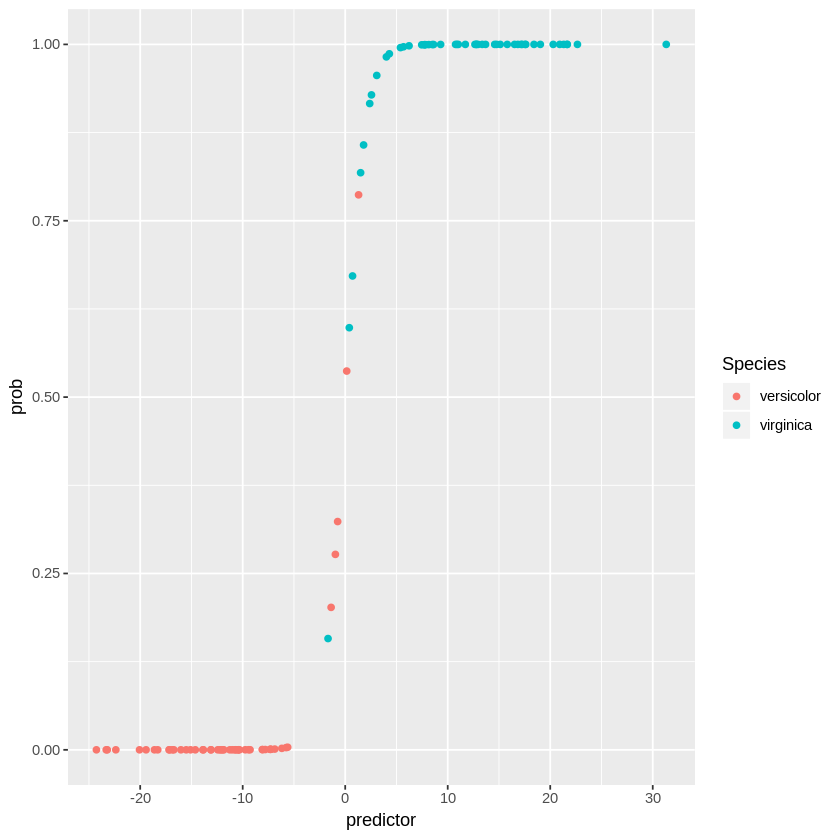

In [26]:
ggplot(lr_data, aes(x=predictor, y=prob, color=Species)) + geom_point()

### Make a density plot that shows how the two species are separated by the linear predictor.

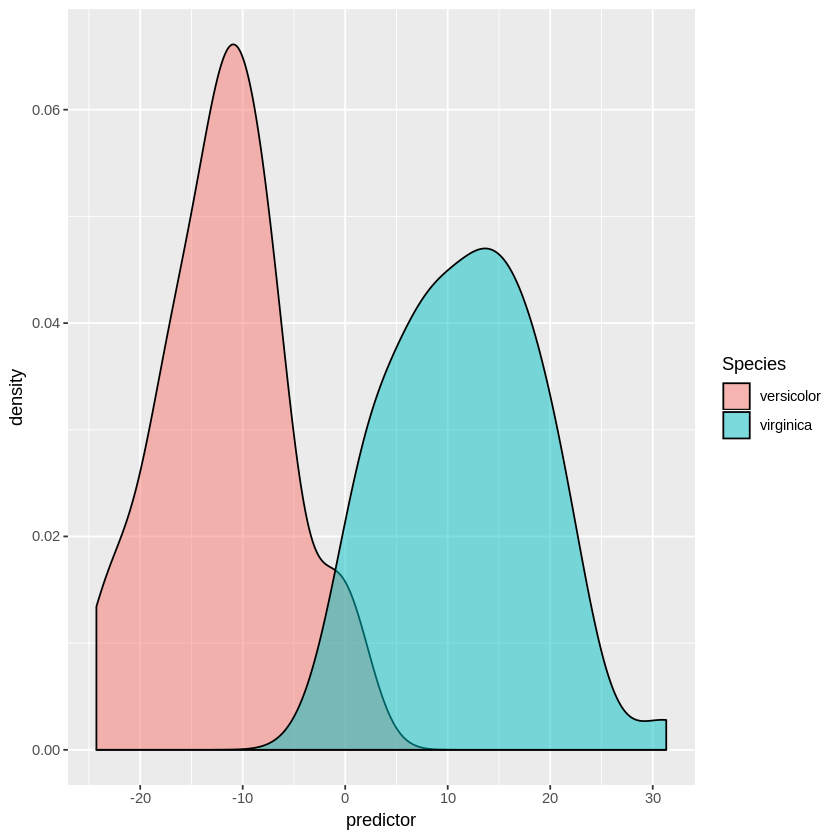

In [27]:
ggplot(lr_data, aes(x=predictor, fill=Species)) + geom_density(alpha=.5)

# 2. Predicting the species

Assume you have obtained samples from three plants, with measurements as listed below. Predict the likelihood that each of these plants belongs to the species virginica.

In [28]:
plant1 <- data.frame(Sepal.Length=6.4, Sepal.Width=2.8, Petal.Length=4.6, Petal.Width=1.8)
plant2 <- data.frame(Sepal.Length=6.3, Sepal.Width=2.5, Petal.Length=4.1, Petal.Width=1.7)
plant3 <- data.frame(Sepal.Length=6.7, Sepal.Width=3.3, Petal.Length=5.2, Petal.Width=2.3)

In [29]:
predict(glm.out, plant1, type="response")

1 
0.6934611

Plant 1 has a 69% probability of being virginica. It may be a virginica.

In [30]:
predict(glm.out, plant2, type="response")

1 
0.06002675

Plant 2 has a 0.6% probability of being virginica. It is very likely versicolor.

In [31]:
predict(glm.out, plant3, type="response")

1 
0.9999943

Plant 3 has a 99.9% probability of being virginica. It is very likely virginica.

# 3. If this was easy

Pick a cutoff predictor value at which you would decide that a specimen belongs to virginica rather than versicolor. Calculate how many virginicas you call correctly and how many incorrectly given that choice.

In [32]:
cutoff <- 0
virg_true <- sum(lr_data$predictor > cutoff & lr_data$Species=="virginica") 
virg_false <- sum(lr_data$predictor <= cutoff & lr_data$Species=="virginica") 
virg_true

[1] 49

In [33]:
virg_false

[1] 1

Now do the same calculation for versicolor.

In [34]:
vers_true <- sum(lr_data$predictor <= cutoff & lr_data$Species=="versicolor") 
vers_false <- sum(lr_data$predictor > cutoff & lr_data$Species=="versicolor") 
vers_true

[1] 48

In [35]:
vers_false

[1] 2

If we define a call of virginica as a positive and a call of versicolor as a negative, what are the true positive rate (sensitivity, true positives divided by all possible positives) and the true negative rate (specificity, true negatives divided by all possible negatives) in your analysis?

In [36]:
tp <- virg_true/(virg_true + virg_false)
tn <- vers_true/(vers_true + vers_false)
tp

[1] 0.98

In [37]:
tn

[1] 0.96

The true-positive rate (sensitivity) is 96%.

The true-negative rate (specificity) is 98%.